# Group Assignment 1
Due 10/2

## Objective

To practice computing, manipulating and visualizing degree distribution information.

## Data

In this lab, we will be working with two networks. The first is an undirected social network of frequent associations between 62 dolphins in a community living off [Doubtful Sound, New Zealand](http://en.wikipedia.org/wiki/Doubtful_Sound), as compiled by Lusseau et al. (2003). See D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, _Behavioral Ecology and Sociobiology 54_, 396-405 (2003) for additional details.

The second network is an Erdos-Renyi random graph containing 62 nodes and generated to approximate the density of the dolphin network. It was generated using the `erdos_renyi_graph()` function in NetworkX with edge probability 0.084. 

## Analysis

Your task in this lab is to compare the two networks based on degree distribution, visualized several different ways, and on robustness to node removal. We will evaluate robustness based on experiments in which we remove nodes from the networks until the giant component (largest component) falls below 66% of its original size. (The networks are all fully connected at the start.)

You should treat this notebook like a worksheet with various questions to answer along the way. At the end, there is a place for a summary paragraph.



### Imports


In [413]:
import networkx as nx
import scipy as sp
import random
import matplotlib.pyplot as plt
%matplotlib inline 
import urllib.request
import numpy as np
import matplotlib.patches as mpatches

### Loading the networks

In [5]:
url = "http://josquin.cti.depaul.edu/~rburke/courses/s14/dolphins.net"

with urllib.request.urlopen(url) as response:
    dolphin_multi = nx.read_pajek(response) # Pajek graphs are multigraphs by default
dolphin = nx.Graph(dolphin_multi)


In [6]:
url = url = "http://josquin.cti.depaul.edu/~rburke/courses/s14/er_graph2.net"

with urllib.request.urlopen(url) as response:
    er_multi = nx.read_pajek(response) # Pajek graphs are multigraphs by default
er_graph = nx.Graph(er_multi)

### Question 1 
Draw the networks (include the names for the dolpins)
_1 point_

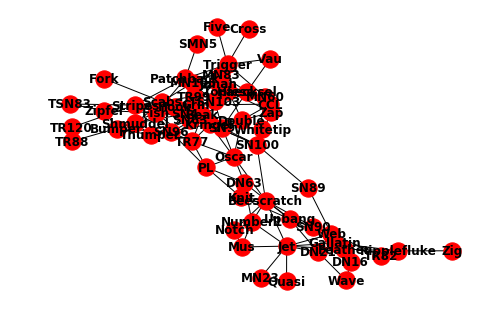

In [99]:
nx.draw(dolphin, with_labels=True, font_weight='bold')

In [120]:
dolphin.edges()

EdgeView([('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchba

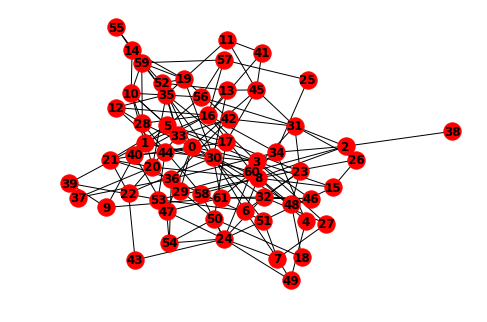

In [31]:
nx.draw(er_graph, with_labels=True, font_weight='bold')

### Question 2
Compute and print the density of the two networks. _1 point_

In [23]:
den_dolph = round(dolphin.number_of_edges()/1891, 3)
den_er = round(er_graph.number_of_edges()/11781, 3)
print("Dolphin density: ", den_dolph, 
      "ER density: ", den_er)

Dolphin density:  0.084 ER density:  0.013


### Question 3
How do the networks compare in terms of visual organization? Is there structure that you can see in the graph layout?
_1 point_

Visually I'd say the networks are quite different from one another. The dolphin graph, no matter how many times I run it, seems to take a "dumbbell" shape with too very dense sections on either ends of eachother with a few nodes and edges in the middle. The ER graph, after running it several times, maintains a pretty consistent shape of what you'd imagine any network graph looks like. Uniform throughout with only a few outliers around the edge.

### Question 4
Calculate and plot the degree distributions. The plots should have the same x and y axes (0-12 x 0-17) so that they can be more readily compared. Hints: Use the `bins` parameter to control the bins used in the histogram, and use the `ylim` function to control the y axis scale.
_1 point_

(array([15.,  6.,  5.,  8.,  8.,  7.,  4.,  4.,  2.,  3.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

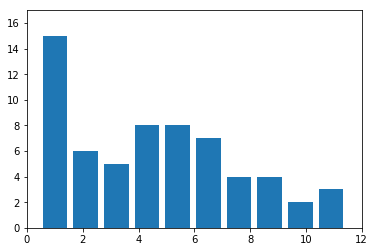

In [188]:
#plt.autoscale(enable = True)
#dolphins_dict = dict(dolphin.degree)

plt.ylim(0,17)
plt.xlim(0,12)
dolphin_deg = dict(nx.degree(dolphin))
plt.hist(dolphin_deg.values(), rwidth=0.8, align='left')




(array([ 1.,  6.,  7., 12., 16.,  7.,  6.,  3.,  2.,  2.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

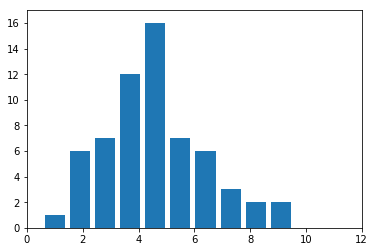

In [189]:
plt.autoscale(enable = True)
plt.ylim(0,17)
plt.xlim(0,12)
er_deg = dict(nx.degree(er_graph))
plt.hist(er_deg.values(), rwidth=0.8, align='left')

### Question 5
How are the distributions different? Consider the shape of the distribution and what it says about the prevalence of different degree values?
_1 point_

The distributions differ..

### Question 6
Networks with nodes sized as a function of degree
_1 point_

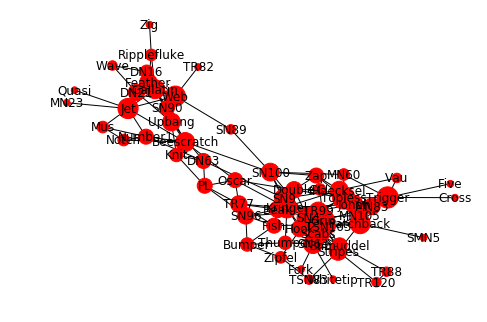

In [145]:
dolphin_sizes = [dolphin_deg[node]*45 for node in dolphin.nodes()]
nx.draw(dolphin, with_labels=True, node_size=dolphin_sizes)

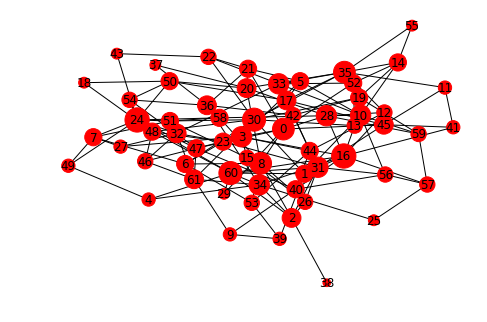

In [146]:
er_sizes = [er_deg[node]*59 for node in er_graph.nodes()]
nx.draw(er_graph, with_labels = True, node_size = er_sizes)

### Question 7
How do the degree distribution differences show up in the visualizations with degree mapped to node size?
_1 point_

The degree distribution differences show ....

### Question 8
Random node removal

Write code to remove nodes randomly from each network, stopping when the largest component is less than 0.66 times the size (number of nodes) as the _original_ network. (Don't forget to make a copy of the network before you start removing nodes.) Return the number of removals required. Hint: the original network has 62 nodes, so you will stop when the giant component has 40 nodes or less (62 * 0.66 = 40.92). 2nd hint: I recommend that you decompose this problem into three or four distinct functions and work on one at a time. _2 points_

In [102]:
# dolphin_copy = dolphin.copy()

#*********This function takes a network and removes and random node***************
def remove_rand_node(network):
    tempList = list(network.nodes()) #creates temporary list of all nodes in the network
    randNum = random.randint(0, len(tempList)-1) #computes a random integer from 0-amount of nodes in network
    
    trashedNode = tempList[randNum] #grabs a node at random using the randNum variable from above, this node will be removed
    
    network.remove_node(trashedNode) #removes that node from the network using the networks own remove method
    
    return #just exits the function, acts like void return

In [139]:

#****** this function returns the size of the largest component as an integer *****
def returnLargestCompSize(network):
    tempList = list(nx.connected_components(network)) #creates temp list of nodes categorized in components
    numOfComps = len(tempList) # keeps track of the number of components
    max = len(tempList[0]) # sets the largest sized component to the first component
    
    for comp in tempList: # compares the size of each component to its successor
        if len(comp) >= max: # ^ same as above
            max = len(comp) # makes new largest size the max
    return max # returns the max aka the size of the largest component
        
        

In [119]:
test = dolphin.copy()
print("****Number of nodes before =", len(test),"*****")
list1 = list(nx.connected_components(test))
print(list1, "\n\n>>> NUM OF COMP = ", len(list1),"\n")
for x in range(10):
    remove_rand_node(test)
print("****Number of nodes after =", len(test),"****")
list2 = list(nx.connected_components(test))
print(list2, "\n\n>>> NUM OF COMP = ", len(list2))

****Number of nodes before = 62 *****
[{'Beak', 'Haecksel', 'TR120', 'Web', 'SN90', 'Number1', 'Beescratch', 'TSN83', 'Upbang', 'Fish', 'TR77', 'SN9', 'Five', 'MN60', 'MN83', 'Bumper', 'DN63', 'Ripplefluke', 'PL', 'Patchback', 'Oscar', 'Whitetip', 'DN21', 'DN16', 'Wave', 'Fork', 'Scabs', 'SMN5', 'TR88', 'MN23', 'CCL', 'Zipfel', 'Notch', 'Vau', 'Hook', 'MN105', 'Knit', 'Quasi', 'Cross', 'Kringel', 'Double', 'SN96', 'SN63', 'Stripes', 'Mus', 'SN4', 'SN89', 'Jet', 'Topless', 'Feather', 'SN100', 'Trigger', 'Zig', 'Zap', 'Jonah', 'TR99', 'Shmuddel', 'TSN103', 'Grin', 'Gallatin', 'TR82', 'Thumper'}] 

>>> NUM OF COMP =  1 

****Number of nodes after = 52 ****
[{'Haecksel', 'Web', 'SN90', 'Number1', 'Beescratch', 'Upbang', 'Fish', 'TR77', 'SN9', 'Five', 'MN60', 'MN83', 'Bumper', 'DN63', 'Ripplefluke', 'PL', 'DN16', 'Patchback', 'DN21', 'Wave', 'Fork', 'Scabs', 'MN23', 'CCL', 'Notch', 'Zipfel', 'Hook', 'Vau', 'MN105', 'Cross', 'Kringel', 'Double', 'SN96', 'SN63', 'Mus', 'SN4', 'SN89', 'Jet', '

In [174]:
dolphin2 = dolphin.copy() # create copy of network
count = 0 # set count to zero
sizeOfLargestComp = returnLargestCompSize(dolphin2) # set the base number

while(sizeOfLargestComp >= len(dolphin2)*0.66): # while the biggest component is more than 2/3 the whole size of the network
    remove_rand_node(dolphin2) # remove a random node
    sizeOfLargestComp = returnLargestCompSize(dolphin2) # update the size of the largest component
    count = count+1 # increment count by 1

    
print("The program ran ",count," times")

The program ran  37  times


In [178]:
er_graph2 = er_graph.copy()
count = 0 # set count to zero
sizeOfLargestComp = returnLargestCompSize(er_graph2) # set the base number

while(sizeOfLargestComp >= len(er_graph2)*0.66): # while the biggest component is more than 2/3 the whole size of the network
    remove_rand_node(er_graph2) # remove a random node
    sizeOfLargestComp = returnLargestCompSize(er_graph2) # update the size of the largest component
    count = count+1 # increment count by 1

    
print("The program ran ",count," times")

The program ran  34  times


### Question 9
Run the removal experiment 100 times on each of the dolphin network and the random network. Compute the average number of removals required in each network to shrink the largest component to 2/3 size.
_1 point_

In [340]:
list_for_dolphin = [] # creates empty list

for x in range(100): # run code 100 times
    dolphin2 = dolphin.copy() # create copy of network
    count = 0 # set count to zero
    sizeOfLargestComp = returnLargestCompSize(dolphin2) # set the base number

    while(sizeOfLargestComp >= len(dolphin2)*0.66): # while the biggest component is more than 2/3 the whole size of the network
        remove_rand_node(dolphin2) # remove a random node
        sizeOfLargestComp = returnLargestCompSize(dolphin2) # update the size of the largest component
        count = count+1 # increment count by 1
    list_for_dolphin.append(count)
    
print(sum(list_for_dolphin)/len(list_for_dolphin)) # computes and prints average

33.87


In [344]:
list_for_er = [] # creates empty list

for x in range(100): # run code 100 times
    er_graph2 = er_graph.copy() # create copy of network
    count = 0 # set count to zero
    sizeOfLargestComp = returnLargestCompSize(er_graph2) # set the base number

    while(sizeOfLargestComp >= len(er_graph2)*0.66): # while the biggest component is more than 2/3 the whole size of the network
        remove_rand_node(er_graph2) # remove a random node
        sizeOfLargestComp = returnLargestCompSize(er_graph2) # update the size of the largest component
        count = count+1 # increment count by 1
    list_for_er.append(count)
    
print(sum(list_for_er)/len(list_for_er)) #computes and prints average

41.26


### Question 10
How do these values compare?
_1 point_

These values compare...

### Question 11
Compare reduced networks

Compute examples of the networks reduced by random removal and draw them.
_1 point_

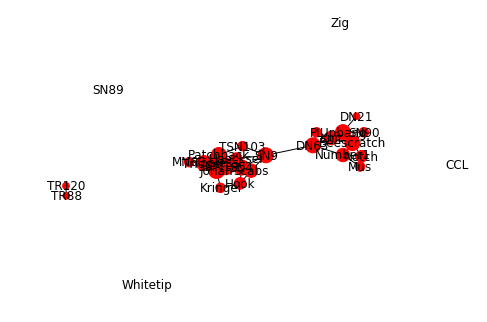

In [322]:
dolphin3 = dolphin.copy()

for x in range(33): # inside range(*) you can place any number and it'll remove that amount of nodes randomly
    remove_rand_node(dolphin3)
dolphin3_deg = dict(nx.degree(dolphin3))
dolphin3_sizes = [dolphin3_deg[node]*45 for node in dolphin3.nodes()]
nx.draw(dolphin3, with_labels=True, node_size=dolphin3_sizes)

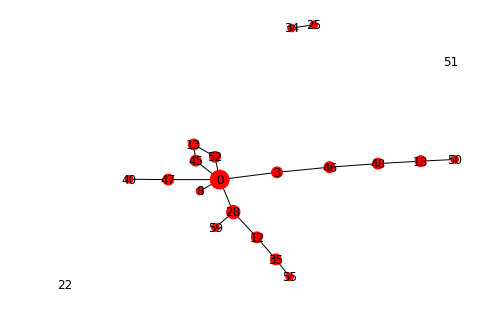

In [323]:
er3 = er_graph.copy()

for x in range(41): # inside range(*) you can place any number and it'll remove that amount of nodes randomly
    remove_rand_node(er3)
er3_deg = dict(nx.degree(er3))
er3_sizes = [er3_deg[node]*59 for node in er3.nodes()]
nx.draw(er3, with_labels = True, node_size = er3_sizes)

### Question 12
Plot the degree distributions for these two networks. As above, control the dimensions to be the same in both plots so they can be compared. Be careul not to lose any data! Plot first without setting the dimensions so you can see how they should be scaled. The y axis should be one unit larger than the maximum value so that the top of the bar does not overlap with the plot perimeter. _1 point_

(array([4., 3., 6., 0., 3., 3., 0., 7., 2., 1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

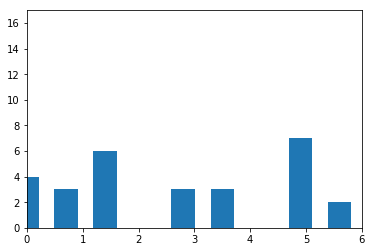

In [324]:
plt.ylim(0,17)
plt.xlim(0,6)
dolphin3_deg = dict(nx.degree(dolphin3))
plt.hist(dolphin3_deg.values(), rwidth=0.6, align='left')

(array([ 2.,  7.,  0., 10.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

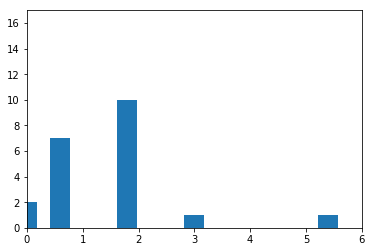

In [325]:
plt.ylim(0,17)
plt.xlim(0,6)

er3_deg = dict(nx.degree(er3))
plt.hist(er3_deg.values(), rwidth=0.6, align='left')

### Question 13
How do the reduced networks compare with each other and with their original form?
_1 point_

The reduced networks compare in that they...

### Question 14
Targeted node removal

Write code to remove the largest degree nodes from each network, stopping when the largest component is 0.66 times the original network. As before, return the number of removals required.
_2 point_

In [326]:
#**** this function finds the node with the largest degree and removes it *******
def remove_node_largestDegree(network):
    tempDict = dict(network.degree()) # creates a temp dict 
    keys = list(tempDict.keys()) # creates a useful list of all keys
    values = list(tempDict.values()) # creates a useful list of all values (degrees)
    maxDegree = max(values) # find the max number of degree in the list
    
    for i in range(len(values)): # goes through the values list until it hits the max value already calculated
        if values[i] == maxDegree: # if it finds the max ...
            network.remove_node(keys[i]) # it removes the key value associated w/ it from the network
            return
    
    
        
            

In [327]:
test = dolphin.copy()
print(len(test.nodes())," << size of test nodes")
tempDict = dict(test.degree()) # creates a temp dict 
keys = list(tempDict.keys()) # creates a useful list of all keys
print("Keys size: " , len(keys))
values = list(tempDict.values()) # creates a useful list of all values (degrees)
print("Values size: " , len(values))
maxDegree = max(values) # find the max number of degree in the list
print("Max degree in values: ", maxDegree)
 
for i in range(len(values)):
    if values[i] == maxDegree: 
        print("Node to be removed: ", keys[i])
        test.remove_node(keys[i])
  

print(len(test.nodes())," << size of test nodes")
        

62  << size of test nodes
Keys size:  62
Values size:  62
Max degree in values:  12
Node to be removed:  Grin
61  << size of test nodes


In [328]:
dolphin4 = dolphin.copy() # create copy of network
count = 0 # set count to zero
sizeOfLargestComp = returnLargestCompSize(dolphin4) # set the base number

while(sizeOfLargestComp >= len(dolphin4)*0.66): # while the biggest component is more than 2/3 the whole size of the network
    remove_node_largestDegree(dolphin4) # remove a random node
    sizeOfLargestComp = returnLargestCompSize(dolphin4) # update the size of the largest component
    count = count+1 # increment count by 1

    
print("The program ran ",count," times")

The program ran  15  times


In [329]:
er_graph4 = er_graph.copy()
count = 0 # set count to zero
sizeOfLargestComp = returnLargestCompSize(er_graph4) # set the base number

while(sizeOfLargestComp >= len(er_graph4)*0.66): # while the biggest component is more than 2/3 the whole size of the network
    remove_node_largestDegree(er_graph4) # remove a random node
    sizeOfLargestComp = returnLargestCompSize(er_graph4) # update the size of the largest component
    count = count+1 # increment count by 1

    
print("The program ran ",count," times")

The program ran  17  times


### Question 15
Apply the targeted removal process to both networks.
_1 point_

In [ ]:
# already done above ^

### Question 16
How do these values compare? How do they compare with the values from random deletion?
_1 point_

These values are going to be the same every time they are ran, unlike the random deletion...

### Question 17
Draw the reduced networks
_1 point_

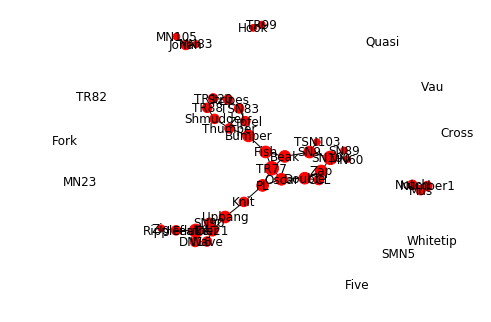

In [330]:
dolphin4_deg = dict(nx.degree(dolphin4))
dolphin4_sizes = [dolphin4_deg[node]*45 for node in dolphin4.nodes()]
nx.draw(dolphin4, with_labels=True, node_size=dolphin4_sizes)

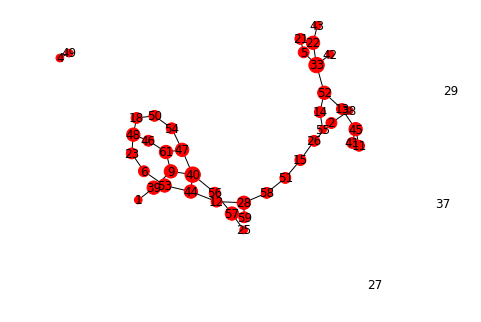

In [331]:
er4_deg = dict(nx.degree(er_graph4))
er4_sizes = [er4_deg[node]*59 for node in er_graph4.nodes()]
nx.draw(er_graph4, with_labels = True, node_size = er4_sizes)

### Question 18
Plot the degree distributions of the reduced networks. As before, control the dimensions to be the same in both plots so they can be compared. _1 point_

(array([ 9.,  0.,  8.,  0.,  0., 17.,  0., 10.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

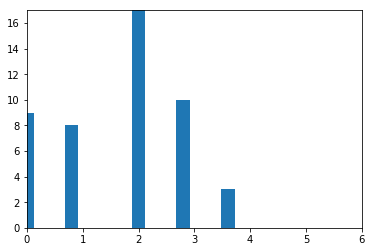

In [334]:
plt.ylim(0,17)
plt.xlim(0,6)
dolphin4_deg = dict(nx.degree(dolphin4))
plt.hist(dolphin4_deg.values(), rwidth=0.6, align='left')

(array([ 3.,  0.,  8.,  0.,  0., 20.,  0., 12.,  0.,  2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

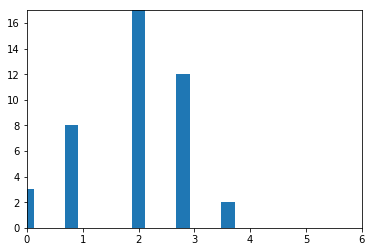

In [335]:
plt.ylim(0,17)
plt.xlim(0,6)

er4_deg = dict(nx.degree(er_graph4))
plt.hist(er4_deg.values(), rwidth=0.6, align='left')

### Question 19
How do the networks compare to each other and to the original networks?
_1 point_

The networks shown above compare to the original networks in that....

### Question 20
Comparing the two conditions: Create a bar plot comparing the values for the random and target removal conditions for the two networks. Use different colors for the two networks -- this requires two calls to the `bar()` function. Hint: The numbers from my solution are correctly plotted in this sample plot, so if your plot looks different, you may be doing something wrong. _1 point_

Extra credit: Add legend, xticks, ylabel, and title as in the figure below:
_2 points possible_

![Homework 1 plot](http://josquin.cti.depaul.edu/~rburke/courses/s14/hwk1-plot.png)

In [345]:
finalDolphin = dolphin.copy()
finalER = er_graph.copy()

for x in range(33): 
    remove_rand_node(finalDolphin)
for x in range(41):
    remove_rand_node(finalER)

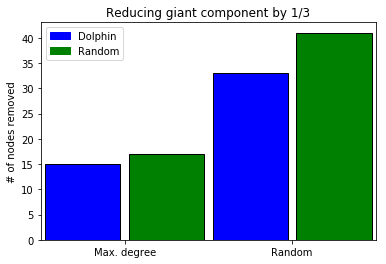

In [414]:
dolph_rand = plt.bar(5, 33, width=1.8, color='b', edgecolor = 'black')
dolph_maxdeg = plt.bar(1, 15, width=1.8, color ='b', edgecolor = 'black')
Dolphin = mpatches.Patch(color='b', label='Dolphin')

er_rand = plt.bar(7, 41, width=1.8, color='g', edgecolor = 'black')
er_maxdeg = plt.bar(3, 17, width=1.8, color='g', edgecolor = 'black')
Random = mpatches.Patch(color='g', label='Random')

plt.ylabel('# of nodes removed')
plt.title('Reducing giant component by 1/3')
plt.xlim(0,8)
plt.xticks((2,6), ('Max. degree','Random'))
plt.legend(handles = [Dolphin, Random], loc=2)
 

### Question 21

Write a paragraph summarizing your comparison of the two networks on the basis of the analysis above.
_2 points_

_Answer here_

## Hints and notes

* Make sure that you make a copy of the network and delete nodes from the copy.

* To compute mean, you can use `sp.mean`, a function imported from the `scipy` package for scientific computing.

* Note that the degrees of many nodes could potentially change when one node is removed. You have to recompute all the degree values when a node is removed.

* For Question 19, you will need to make use of the following `matplotlib.pylot` functions
    * `bar` (`color` and `label` arguments)
    * `legend` (`loc=2`)
    * `xticks`
    * `ylabel`
    * `title`
    
* Each group has a “locker” on D2L that you can use to share documents like this workbook. You may prefer to use Dropbox or Google Docs to achieve a similar effect. Don't share assignment work on Slack except in your group channel as the other channels are available to the entire class.


## Suggested division of labor:
There is a lot to do in this assignment. A suggested division of labor would be as follows:
* Data gathering specialists: Work in the programming-intensive parts – Questions 8, 9, 14, and 15.
* Data analysis specialists: Develop visualizations. Study the matplotlib documentation to determine how to create the plot for Question 20.
* Project coordinator: Coordinate the project work. With the help of the data analyst, write the text answers to Questions 3, 5, 7, 13, 16, 19, 21.
